# LangChain Fundamentals 📚📚

In [1]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 434.8 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https:/

DEPRECATION: Loading egg at c:\users\pusha\appdata\local\programs\python\python311\lib\site-packages\rgbcraft-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame with two points
data = {'ID': [1, 2],
        'Latitude': [38.0850095210875, 38.11740218562655 ],
        'Longitude': [-0.9483816545176874, -0.9528362878196897]}

geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # Set CRS to EPSG:4326 (WGS 84)

# Print the GeoDataFrame
print("GeoDataFrame:")
print(gdf)

# Reproject to a CRS that uses meters (e.g., EPSG:3395, World Mercator)
gdf = gdf.to_crs("EPSG:3395")

# Calculate distance between the two points using haversine
distance = gdf.distance(gdf.shift())  # Shift the GeoDataFrame and calculate distance
distance_km = distance.to_numpy()[1] / 1000  # Convert distance to kilometers

print("\nDistance between the two points:", distance_km, "kilometers")


GeoDataFrame:
   ID   Latitude  Longitude                   geometry
0   1  38.085010  -0.948382  POINT (-0.94838 38.08501)
1   2  38.117402  -0.952836  POINT (-0.95284 38.11740)

Distance between the two points: 4.590148470149924 kilometers


C:\Users\pusha\AppData\Local\Temp\ipykernel_8676\537653055.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_circles['geometry'] = gdf_circles.buffer(radius)


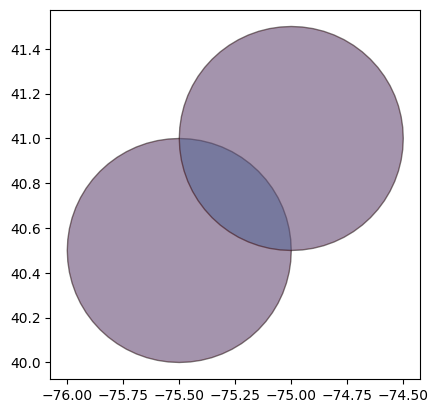

In [3]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: Create a GeoDataFrame with your points
data = {'Name': ['Point1', 'Point2'],
        'geometry': [Point(-75.5, 40.5), Point(-75, 41)]}


gdf_points = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:4326')

# Step 2: Buffer the points to create circles with a specified radius
radius = 0.5  # Assuming a radius of 0.5 degrees (adjust as needed)
gdf_circles = gdf_points.copy()
gdf_circles['geometry'] = gdf_circles.buffer(radius)

# Step 3: Merge or intersect the circles to find the catchment area
catchment = gdf_circles.unary_union

# Optional: Plot the result
ax = gdf_circles.plot(alpha=0.5, edgecolor='k')
gpd.GeoSeries(catchment).plot(ax=ax, color='red', alpha=0.2)

# Show the plot
import matplotlib.pyplot as plt
plt.show()



In [4]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import cascaded_union

# Step 1: Create a GeoDataFrame with your points
data = {
    'id': ['Point1', 'Point2', 'Point3'],
    'geometry': [
        Point(38.0850095210875, -0.9483816545176874),
        Point(38.11740218562655, -0.9528362878196897),
        Point(38.11740218562655, -0.9428362878196897)],
}

gdf = gpd.GeoDataFrame(data, geometry='geometry', crs='epsg:4326')

# Reproject to a CRS that uses meters (e.g., EPSG:3395, World Mercator)
gdf = gdf.to_crs("EPSG:3395")


# Buffer around each point
buffer_radius = 3000  # in meters
gdf['buffer'] = gdf['geometry'].buffer(buffer_radius)

# Merge all buffers into a single geometry (union of all buffers)
union_buffer = cascaded_union(gdf['buffer'])

# Function to count points within the union_buffer
def count_points_within_buffer(point):
    intersection = point.buffer(buffer_radius).intersection(union_buffer)
    return sum(gdf['geometry'].within(intersection))-1

# Apply the function to each point
gdf['interference_count'] = gdf['geometry'].apply(count_points_within_buffer)

# Resulting GeoDataFrame
print(gdf[['id', 'interference_count']])


       id  interference_count
0  Point1                   0
1  Point2                   1
2  Point3                   1


C:\Users\pusha\AppData\Local\Temp\ipykernel_8676\1810361023.py:25: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  union_buffer = cascaded_union(gdf['buffer'])


C:\Users\pusha\AppData\Local\Temp\ipykernel_8676\2964996957.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


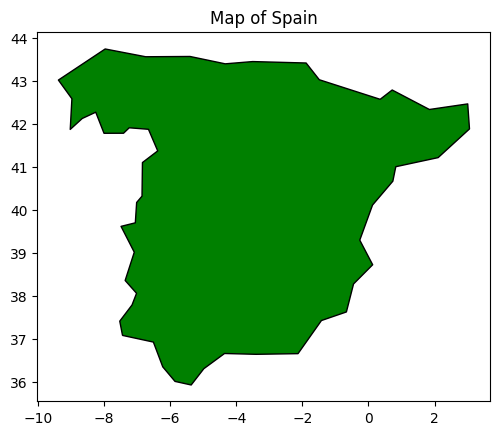

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Function to plot a country on the map
def plot_country(country_name):
    # Filter the data for the specific country
    country = world[world['name'] == country_name]

    # Plot the country
    ax = country.plot(color='green', edgecolor='black')

    # Add a title
    ax.set_title(f'Map of {country_name}')

    # Show the plot
    plt.show()

# Get input from the user (kid)
user_country = "Spain"

# Plot the selected country on the map
plot_country(user_country)


C:\Users\pusha\AppData\Local\Temp\ipykernel_8676\696203729.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


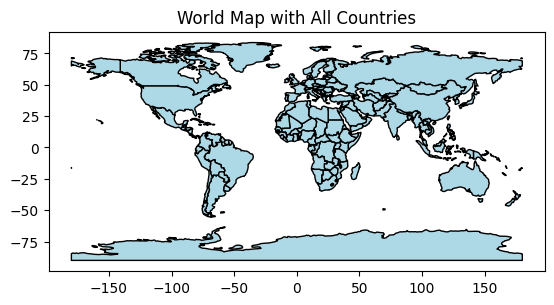

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot all countries on the map
ax = world.plot(color='lightblue', edgecolor='black')

# Add a title
ax.set_title('World Map with All Countries')

# Show the plot
plt.show()

In [11]:
import warnings

# Suppress FutureWarnings and UserWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

C:\Users\pusha\AppData\Local\Temp\ipykernel_1056\35204151.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\pusha\AppData\Local\Temp\ipykernel_1056\35204151.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


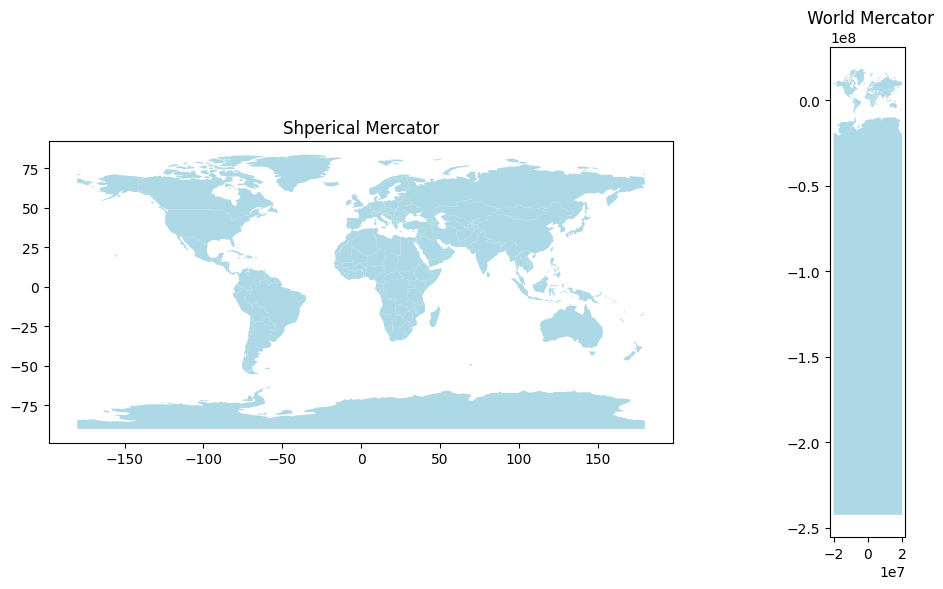

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# EPSG:3857, Shperical Mercator
world.to_crs("EPSG:3395")

# Plot the world map in the default projection (PlateCarree)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot in the default PlateCarree projection
world.plot(ax=ax[0], color='lightblue')
ax[0].set_title('Shperical Mercator')

# EPSG:3395, World Mercator
world.to_crs("EPSG:3857").plot(ax=ax[1], color='lightblue')
ax[1].set_title(' World Mercator')
ax[1].set_aspect('equal')
ax[1].set_xlim([-2e7, 2e7])
ax[1].set_ylim([-2e7, 2e7])

# Display the plots
plt.tight_layout()
plt.show()


In [9]:
from pyproj import CRS
crs_utm = CRS.from_user_input(26915)
crs_utm

<Projected CRS: EPSG:26915>
Name: NAD83 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 96°W and 90°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Arkansas; Illinois; Iowa; Kansas; Louisiana; Michigan; Minnesota; Mississippi; Missouri; Nebraska; Oklahoma; Tennessee; Texas; Wisconsin.
- bounds: (-96.0, 25.61, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich